<a href="https://colab.research.google.com/github/Lorenzopiloto/Statistics-DS/blob/main/Teste%20F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste F e Análise de correlação

## Bibliotecas

In [1]:
# gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# teste
from scipy.stats import f, f_oneway

In [4]:
df_salarios = pd.read_csv('dados_salarios.csv')

In [10]:
df_dietas = pd.read_csv('dados_dietas.csv', sep=';')

In [11]:
df_preco_quant = pd.read_csv('exemplo_preco_quant.csv', sep=';')

In [12]:
df_salarios.groupby('cidade')\
            .agg(media_salarios = pd.NamedAgg('salarios', 'mean'),
                 dp_salarios = pd.NamedAgg('salarios' , 'std'),
                 n = pd.NamedAgg('salarios' , 'count'),)

,media_salarios,dp_salarios,n
cidade,,,
A,2964.052109,1117.505582,10
B,2432.859069,1342.126772,15


H0: $\sigma_{A}^2 = \sigma_{b}^2$

Ha: $\sigma_{A}^2 \neq \sigma_{b}^2$


- Teste F

In [13]:
valores_a = df_salarios[df_salarios['cidade'] == 'A']['salarios']
valores_b = df_salarios[df_salarios['cidade'] == 'B']['salarios']

In [17]:
# calcular o F
valor_f = np.var(valores_a, ddof = 1) / np.var(valores_b, ddof = 1)
valor_f

0.6932858292724237

In [19]:
# Obter os graus de liberdade
gl_a = len(valores_a) - 1
gl_b = len(valores_b) - 1
gl_a, gl_b

(9, 14)

In [23]:
def f_valor_p(estatistica_f, gl_a, gl_b, alternative):
  '''tipo teste: greater, less, two-sided'''
  if alternative == 'greater':
    return 1 - f.cdf(estatistica_f, gl_a, gl_b)
  elif alternative == 'Less':
    return f.cdf(estatistica_f, gl_a, gl_b)
  else:
    min_f = f.cdf(estatistica_f, gl_a, gl_b)
    max_f = 1 - f.cdf(estatistica_f, gl_a, gl_b)
    return min([min_f, max_f])*2

In [24]:
f_valor_p(valor_f, gl_a, gl_b, 'two-sided')

0.5895222755367536

## Exemplo dietas

In [25]:
df_dietas.groupby('dieta') \
         .agg(media_dieta = pd.NamedAgg('perda_peso_kg', 'mean'),
              dp_calorias = pd.NamedAgg('perda_peso_kg', 'std'),
              n = pd.NamedAgg('perda_peso_kg', 'count'))

,media_dieta,dp_calorias,n
dieta,,,
baixa_caloria,6.6,2.302173,5
baixa_gordura,3.0,1.581139,5
baixo_carboidrato,3.4,1.140175,5
grupo_controle,1.2,1.643168,5


In [26]:
df_dietas['dieta'].unique()

array(['baixa_caloria', 'baixa_gordura', 'baixo_carboidrato',
       'grupo_controle'], dtype=object)

In [29]:
g_bcal = df_dietas[df_dietas['dieta'] == 'baixa_caloria']['perda_peso_kg']
g_gor = df_dietas[df_dietas['dieta'] == 'baixa_gordura']['perda_peso_kg']
g_bcarb = df_dietas[df_dietas['dieta'] == 'baixo_carboidrato']['perda_peso_kg']
g_bcont = df_dietas[df_dietas['dieta'] == 'grupo_controle']['perda_peso_kg']

In [30]:
f_oneway(g_bcal, g_gor, g_bcarb, g_bcont)

F_onewayResult(statistic=8.559322033898304, pvalue=0.0012777417892066623)

<Axes: title={'center': 'perda_peso_kg'}, xlabel='dieta'>

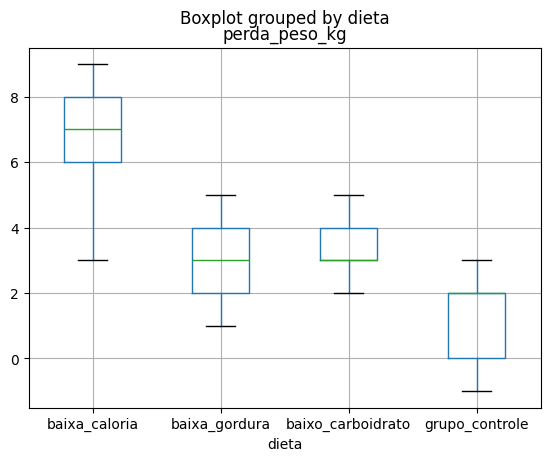

In [31]:
df_dietas.boxplot(column='perda_peso_kg', by='dieta')

# Correlação

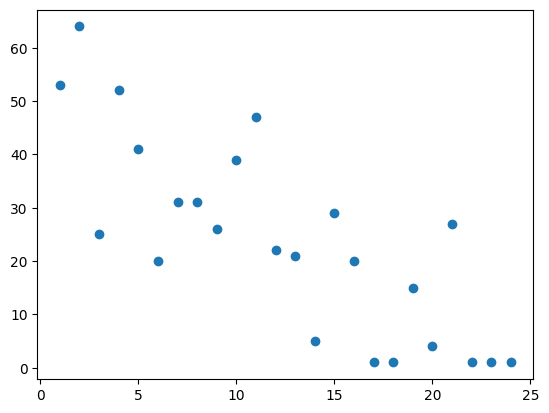

In [38]:
# matpoltlib
plt.scatter(df_preco_quant['Preco'], df_preco_quant['Quantidade'])

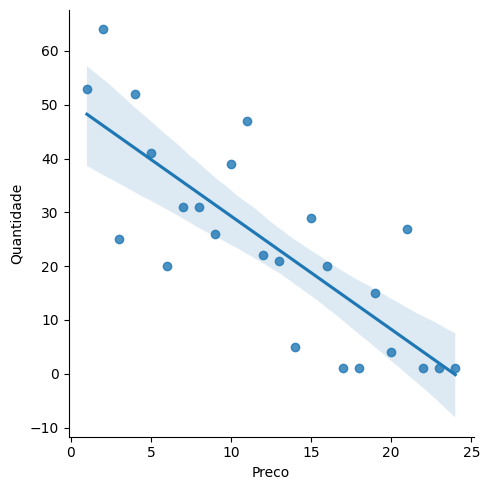

In [39]:
sns.lmplot(x = 'Preco', y = 'Quantidade', data = df_preco_quant, fit_reg = True)

In [40]:
df_preco_quant[['Preco', 'Quantidade']].corr()

,Preco,Quantidade
Preco,1.000000,-0.800847
Quantidade,-0.800847,1.000000
